# Dualing DQN

**Paper**: [Dueling Network Architectures for Deep Reinforcement Learning](https://arxiv.org/pdf/1511.06581.pdf)



In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import matplotlib.pyplot as plt
import gym


from src.utils.Config import Config
from src.utils.Logging import Logger
from src.components.memory import ReplayBuffer

from src.utils.misc import train, watch

In [ ]:
class DualingQNetwork(nn.Module):
    def __init__(self, state_size, action_size, seed, fc1_units=64, fc2_units=64):
    # Call inheritance
    super(DualingQNetwork, self).__init__()
    self.seed = torch.manual_seed(1234)

    self.feature = nn.Sequential(
        nn.Linear(state_size, fc1_units),
        nn.ReLU()
    )

    self.advantage = nn.Sequential(
        nn.Linear(fc1_units, fc2_units),
        nn.ReLU(),
        nn.Linear(fc2_units, action_size)
    )

    self.value = nn.Sequential(
        nn.Linear(fc1_units, fc2_units),
        nn.ReLU(),
        nn.Linear(fc2_units, 1)
    )

    def forward(self, state):
    x = self.feature(state)

    advantage = self.advantage(x)
    value = self.value(x)

    x = value + advantage - advantage.mean()

    return x

In [3]:
config = Config()

config.env = gym.make('CartPole-v1')

config.win_condition = 195.0
config.memory = ReplayBuffer
config.model = DualingQNetwork
config.double_dqn = True
config.print_config()

logger = Logger(config)

env: 		EnvSpec(CartPole-v1)
win condition: 	1905.0
state space	(4,)
action space	2
device: 	cpu
seed: 		123456789
n_episodes: 	2000
max_t: 		1000
eps_start: 	1.0
eps_end: 	0.01
eps_decay: 	0.995
eps_greedy: 	True
noisy: 		False
tau: 		0.001
gamma: 		0.99
lr: 		0.0005
memory: 	<class 'src.components.memory.ReplayBuffer'>
batch_size: 	64
buffer_size: 	100000
lr_annealing: 	False
learn_every: 	4
double_dqn: 	True
model: 		<class 'src.networks.models.DualingQNetwork'>
save_loc: 	None
Logging at: logs/CartPole-v1/experiment-2020-04-16_15_19_48


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [4]:
train(config, logger)

Epi: 100	Average Score: 23.5800	Mean: 20.0000	Duration: 0.0421	#t_s: 19.0000
Epi: 200	Average Score: 22.9500	Mean: 29.0000	Duration: 0.0734	#t_s: 28.0000
Epi: 300	Average Score: 71.6400	Mean: 178.0000	Duration: 0.3558	#t_s: 177.0000
Epi: 400	Average Score: 218.8600	Mean: 208.0000	Duration: 0.4368	#t_s: 207.0000
Epi: 500	Average Score: 237.9200	Mean: 246.0000	Duration: 0.5146	#t_s: 245.0000
Epi: 600	Average Score: 234.7300	Mean: 214.0000	Duration: 0.6117	#t_s: 213.0000
Epi: 700	Average Score: 258.4600	Mean: 266.0000	Duration: 0.5710	#t_s: 265.0000
Epi: 800	Average Score: 398.4100	Mean: 273.0000	Duration: 0.6383	#t_s: 272.0000
Epi: 900	Average Score: 292.6700	Mean: 170.0000	Duration: 0.3603	#t_s: 169.0000
Epi: 1000	Average Score: 164.5600	Mean: 129.0000	Duration: 0.3489	#t_s: 128.0000
Epi: 1100	Average Score: 141.9300	Mean: 132.0000	Duration: 0.2869	#t_s: 131.0000
Epi: 1200	Average Score: 139.7400	Mean: 137.0000	Duration: 0.2972	#t_s: 136.0000
Epi: 1300	Average Score: 125.9100	Mean: 167.

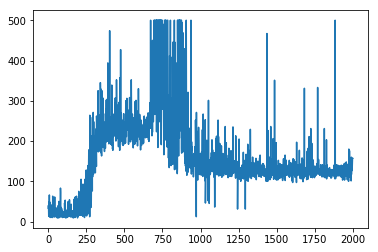

In [5]:
plt.plot(logger.score)

In [12]:
watch(config, logger.log_file_path)